##Preprocessing: MFCC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 
import os,glob,skimage,librosa
import librosa.display

import warnings
warnings.filterwarnings("ignore")    
root="/content/drive/MyDrive/Thesis_Keras/"         #忽略警告信息
csvPth = '/content/drive/MyDrive/Thesis_Keras/UrbanSound8K/metadata/UrbanSound8K.csv'
examplePath = '/content/drive/MyDrive/Thesis_Keras/UrbanSound8K/audio/fold6/85249-2-0-79.wav'

In [ ]:
df = pd.read_csv(csvPth)

df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:

D=[]
for i in range(8732):
  try:
    file_name = '/content/drive/MyDrive/Thesis_Keras/UrbanSound8K/audio/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
    class_id = df["classID"][i]

    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    
    print(f"{i}out of 8732")
    mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
    print('shape: ',mfccs.shape)
    feature = mfccs
    label = class_id
    D.append((feature,label)) 
  except Exception:
    print("Error encountered while parsing file: ", file_name)
    mfccs,class_id = None, None
  


0out of 8732
shape:  (13, 14)
1out of 8732
shape:  (13, 173)
2out of 8732
shape:  (13, 173)
3out of 8732
shape:  (13, 173)
4out of 8732
shape:  (13, 173)
5out of 8732
shape:  (13, 173)
6out of 8732
shape:  (13, 173)
7out of 8732
shape:  (13, 173)
8out of 8732
shape:  (13, 173)
9out of 8732
shape:  (13, 28)
10out of 8732
shape:  (13, 46)
11out of 8732
shape:  (13, 18)
12out of 8732
shape:  (13, 70)
13out of 8732
shape:  (13, 81)


KeyboardInterrupt: ignored

如果已经完成特征提取

In [ ]:
import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 
import os,glob,skimage,librosa
import librosa.display

import warnings
warnings.filterwarnings("ignore")  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X = np.load('/content/drive/MyDrive/Thesis_Keras/MFCC/data/datasetnpy/mfcc_40/x_train.npy',allow_pickle=True)
Y = np.load('/content/drive/MyDrive/Thesis_Keras/MFCC/data/datasetnpy/mfcc_40/y_train.npy')

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=1)


In [ ]:
X_test=np.load('/content/drive/MyDrive/Thesis_Keras/MFCC/data/datasetnpy/mfcc_40/x_test.npy',allow_pickle=True)
Y_test = np.load('/content/drive/MyDrive/Thesis_Keras/MFCC/data/datasetnpy/mfcc_40/y_test.npy')

In [ ]:
print(X_train.shape)
print(X_train.shape[1])
print(X_train.shape[2])

(4466, 40, 173, 1)
40
173


10-fold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.metrics import accuracy_score
import tensorflow as tf
import numpy as np
from tqdm import tqdm
def generate_loader(i_val):
    train_X = []
    train_y=[]
    X_test=[]
    y_test=[]
    for i in range(10):
        if i + 1 == i_val:
            X_test = np.load(
                "/content/drive/MyDrive/Thesis_Keras/TenFoldDataset/datasetnpy/mfccConv2d/mfcc40x80/"+f"fold{i + 1}"+"/X.npy"
                )
            y_test=np.load(
                "/content/drive/MyDrive/Thesis_Keras/TenFoldDataset/datasetnpy/mfccConv2d/mfcc40x80/"+f"fold{i + 1}"+"/y.npy"
            )
        else:
            X_train = np.load(
                "/content/drive/MyDrive/Thesis_Keras/TenFoldDataset/datasetnpy/mfccConv2d/mfcc40x80/"+f"fold{i + 1}"+"/X.npy"
            )
            y_train = np.load(
                "/content/drive/MyDrive/Thesis_Keras/TenFoldDataset/datasetnpy/mfccConv2d/mfcc40x80/"+f"fold{i + 1}"+"/y.npy"
            )

            for item in X_train:
                train_X.append(item)
            for item in y_train:
                train_y.append(item)

    return np.array(train_X),np.array(train_y),np.array(X_test),np.array(y_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Conv1D, Conv2D, Flatten, Reshape, MaxPooling1D, MaxPooling2D, BatchNormalization, TimeDistributed,AveragePooling1D,AveragePooling2D
from tensorflow.keras.optimizers import Adam


def build_model(input_length):
  model = Sequential()
  model.add(Reshape((63, 40,1), input_shape=(40,63)))
  model.add(Conv2D(24, kernel_size=5, activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
  model.add(Conv2D(36, kernel_size=3, activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
  model.add(Conv2D(48, kernel_size=3, activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(40, activation='relu',
  activity_regularizer=tf.keras.regularizers.l1(0.00001)))
  model.add(Dense(10, activation='softmax', name='y_pred'))

  return model

def train_model(model,X_train,Y_train,X_test,Y_test,foldNum):
  EPOCHS = 50
  # this controls the batch size, or you can manipulate the tf.data.Dataset objects yourself
  BATCH_SIZE = 32
  callbacks = []
  # model architecture
  
  # this controls the learning rate
  opt = Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999)
  #callbacks.append(BatchLoggerCallback(BATCH_SIZE, train_sample_count, epochs=EPOCHS))

  # train the neural network
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  model.fit(X_train,Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2,validation_split=0.1,shuffle=True)
  print(model.summary())
  # Use this flag to disable per-channel quantization for a model.
  # This can reduce RAM usage for convolutional models, but may have
  # an impact on accuracy.
  disable_per_channel_quantization = False
  print("Result of fold:"+f"{foldNum}")
  score = model.evaluate(x=X_test,y=Y_test)

**Cross Validation: We record the data of every fold and calculate the mean accuracy and its standard deviation.**

In [ ]:
for i in tqdm(range(10)):
  #from tensorflow.compat.v1.keras import backend as K
  import tensorflow as tf

  import os
  # os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"
  # config = tf.compat.v1.ConfigProto()#对session进行参数配置
  # config.allow_soft_placement=True #如果你指定的设备不存在，允许TF自动分配设备
  # config.gpu_options.per_process_gpu_memory_fraction=0.7#分配百分之七十的显存给程序使用，避免内存溢出，可以自己调整
  # config.gpu_options.allow_growth = True#按需分配显存，这个比较重要
        
  # sess = tf.compat.v1.Session(config=config)
  # #tf.compat.v1.keras.backend.set_session(sess)
  # #K.set_session(sess)
  X_train,y_train,X_test,y_test = generate_loader(i+1)
  #print(X_train[1])
  #print(y_train[1])
  input_len=len(X_train[0])
  model = build_model(input_len)
  if not i==0:
    model = build_model(input_len)
  
  train_model(model,X_train,y_train,X_test,y_test,i+1)
  model.save("/content/drive/MyDrive/Thesis_Keras/"+"model/saved/MFCCConv2D"+f"fold{i+1}"+".h5")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/50
197/197 - 3s - loss: 2.0085 - accuracy: 0.3485 - val_loss: 1.8008 - val_accuracy: 0.3868 - 3s/epoch - 17ms/step
Epoch 2/50
197/197 - 1s - loss: 1.4303 - accuracy: 0.4964 - val_loss: 1.8829 - val_accuracy: 0.3596 - 775ms/epoch - 4ms/step
Epoch 3/50
197/197 - 1s - loss: 1.2169 - accuracy: 0.5803 - val_loss: 1.4506 - val_accuracy: 0.5143 - 787ms/epoch - 4ms/step
Epoch 4/50
197/197 - 1s - loss: 1.1293 - accuracy: 0.6093 - val_loss: 1.3974 - val_accuracy: 0.5544 - 740ms/epoch - 4ms/step
Epoch 5/50
197/197 - 1s - loss: 1.0446 - accuracy: 0.6456 - val_loss: 1.4077 - val_accuracy: 0.5301 - 724ms/epoch - 4ms/step
Epoch 6/50
197/197 - 1s - loss: 0.9734 - accuracy: 0.6750 - val_loss: 1.7471 - val_accuracy: 0.5100 - 724ms/epoch - 4ms/step
Epoch 7/50
197/197 - 1s - loss: 0.9643 - accuracy: 0.6845 - val_loss: 1.4817 - val_accuracy: 0.5115 - 713ms/epoch - 4ms/step
Epoch 8/50
197/197 - 1s - loss: 1.4037 - accuracy: 0.5232 - val_loss: 1.6598 - val_accuracy: 0.5072 - 730ms/epoch - 4ms/step
Ep

 10%|█         | 1/10 [00:46<07:01, 46.85s/it]

Epoch 1/50
197/197 - 1s - loss: 1.9803 - accuracy: 0.3442 - val_loss: 1.7064 - val_accuracy: 0.5000 - 1s/epoch - 7ms/step
Epoch 2/50
197/197 - 1s - loss: 1.4098 - accuracy: 0.5155 - val_loss: 1.7193 - val_accuracy: 0.4484 - 715ms/epoch - 4ms/step
Epoch 3/50
197/197 - 1s - loss: 1.2380 - accuracy: 0.5827 - val_loss: 1.7376 - val_accuracy: 0.4384 - 718ms/epoch - 4ms/step
Epoch 4/50
197/197 - 1s - loss: 1.1480 - accuracy: 0.6165 - val_loss: 1.5509 - val_accuracy: 0.4814 - 711ms/epoch - 4ms/step
Epoch 5/50
197/197 - 1s - loss: 1.1297 - accuracy: 0.6160 - val_loss: 1.4229 - val_accuracy: 0.5287 - 711ms/epoch - 4ms/step
Epoch 6/50
197/197 - 1s - loss: 1.0319 - accuracy: 0.6458 - val_loss: 1.8447 - val_accuracy: 0.4656 - 715ms/epoch - 4ms/step
Epoch 7/50
197/197 - 1s - loss: 1.0379 - accuracy: 0.6456 - val_loss: 1.5854 - val_accuracy: 0.4828 - 705ms/epoch - 4ms/step
Epoch 8/50
197/197 - 1s - loss: 0.9211 - accuracy: 0.6899 - val_loss: 1.3964 - val_accuracy: 0.5688 - 715ms/epoch - 4ms/step
Epo

 20%|██        | 2/10 [01:24<05:31, 41.48s/it]

Epoch 1/50
195/195 - 1s - loss: 1.9240 - accuracy: 0.3918 - val_loss: 1.4185 - val_accuracy: 0.5275 - 1s/epoch - 7ms/step
Epoch 2/50
195/195 - 1s - loss: 1.2900 - accuracy: 0.5630 - val_loss: 1.5904 - val_accuracy: 0.4133 - 704ms/epoch - 4ms/step
Epoch 3/50
195/195 - 1s - loss: 1.1061 - accuracy: 0.6235 - val_loss: 1.4898 - val_accuracy: 0.5202 - 708ms/epoch - 4ms/step
Epoch 4/50
195/195 - 1s - loss: 0.9952 - accuracy: 0.6654 - val_loss: 1.3633 - val_accuracy: 0.5867 - 701ms/epoch - 4ms/step
Epoch 5/50
195/195 - 1s - loss: 0.9910 - accuracy: 0.6677 - val_loss: 1.4856 - val_accuracy: 0.5058 - 708ms/epoch - 4ms/step
Epoch 6/50
195/195 - 1s - loss: 0.9581 - accuracy: 0.6839 - val_loss: 1.3019 - val_accuracy: 0.6286 - 708ms/epoch - 4ms/step
Epoch 7/50
195/195 - 1s - loss: 0.8786 - accuracy: 0.7085 - val_loss: 1.4359 - val_accuracy: 0.5145 - 711ms/epoch - 4ms/step
Epoch 8/50
195/195 - 1s - loss: 0.8387 - accuracy: 0.7212 - val_loss: 1.3543 - val_accuracy: 0.5867 - 705ms/epoch - 4ms/step
Epo

 30%|███       | 3/10 [02:01<04:36, 39.53s/it]

Epoch 1/50
194/194 - 1s - loss: 1.8857 - accuracy: 0.3596 - val_loss: 1.4544 - val_accuracy: 0.4898 - 1s/epoch - 7ms/step
Epoch 2/50
194/194 - 1s - loss: 1.3212 - accuracy: 0.5451 - val_loss: 1.4645 - val_accuracy: 0.4985 - 701ms/epoch - 4ms/step
Epoch 3/50
194/194 - 1s - loss: 1.1562 - accuracy: 0.6076 - val_loss: 1.4829 - val_accuracy: 0.5174 - 701ms/epoch - 4ms/step
Epoch 4/50
194/194 - 1s - loss: 1.0591 - accuracy: 0.6363 - val_loss: 1.1940 - val_accuracy: 0.5741 - 704ms/epoch - 4ms/step
Epoch 5/50
194/194 - 1s - loss: 1.0047 - accuracy: 0.6656 - val_loss: 1.3146 - val_accuracy: 0.5727 - 694ms/epoch - 4ms/step
Epoch 6/50
194/194 - 1s - loss: 0.9307 - accuracy: 0.6892 - val_loss: 1.3917 - val_accuracy: 0.5610 - 699ms/epoch - 4ms/step
Epoch 7/50
194/194 - 1s - loss: 0.9349 - accuracy: 0.6821 - val_loss: 1.2001 - val_accuracy: 0.6105 - 704ms/epoch - 4ms/step
Epoch 8/50
194/194 - 1s - loss: 0.9150 - accuracy: 0.6908 - val_loss: 1.4809 - val_accuracy: 0.5334 - 701ms/epoch - 4ms/step
Epo

 40%|████      | 4/10 [02:44<04:03, 40.63s/it]

Epoch 1/50
196/196 - 2s - loss: 1.9111 - accuracy: 0.3593 - val_loss: 1.3948 - val_accuracy: 0.5237 - 2s/epoch - 9ms/step
Epoch 2/50
196/196 - 1s - loss: 1.3407 - accuracy: 0.5363 - val_loss: 1.4337 - val_accuracy: 0.5122 - 709ms/epoch - 4ms/step
Epoch 3/50
196/196 - 1s - loss: 1.2571 - accuracy: 0.5671 - val_loss: 1.3461 - val_accuracy: 0.5122 - 707ms/epoch - 4ms/step
Epoch 4/50
196/196 - 1s - loss: 1.1065 - accuracy: 0.6119 - val_loss: 1.4206 - val_accuracy: 0.5669 - 710ms/epoch - 4ms/step
Epoch 5/50
196/196 - 1s - loss: 1.0836 - accuracy: 0.6350 - val_loss: 1.2981 - val_accuracy: 0.5424 - 712ms/epoch - 4ms/step
Epoch 6/50
196/196 - 1s - loss: 0.9776 - accuracy: 0.6622 - val_loss: 1.2924 - val_accuracy: 0.5842 - 715ms/epoch - 4ms/step
Epoch 7/50
196/196 - 1s - loss: 0.9655 - accuracy: 0.6716 - val_loss: 1.4208 - val_accuracy: 0.5554 - 708ms/epoch - 4ms/step
Epoch 8/50
196/196 - 1s - loss: 0.9700 - accuracy: 0.6692 - val_loss: 1.3900 - val_accuracy: 0.5698 - 719ms/epoch - 4ms/step
Epo

 50%|█████     | 5/10 [03:26<03:26, 41.23s/it]

Epoch 1/50
198/198 - 1s - loss: 2.3823 - accuracy: 0.2148 - val_loss: 1.8070 - val_accuracy: 0.2973 - 1s/epoch - 7ms/step
Epoch 2/50
198/198 - 1s - loss: 1.6808 - accuracy: 0.3842 - val_loss: 1.6085 - val_accuracy: 0.4068 - 730ms/epoch - 4ms/step
Epoch 3/50
198/198 - 1s - loss: 1.3776 - accuracy: 0.5017 - val_loss: 1.6191 - val_accuracy: 0.4353 - 716ms/epoch - 4ms/step
Epoch 4/50
198/198 - 1s - loss: 1.2809 - accuracy: 0.5341 - val_loss: 1.4651 - val_accuracy: 0.5477 - 720ms/epoch - 4ms/step
Epoch 5/50
198/198 - 1s - loss: 1.1748 - accuracy: 0.5886 - val_loss: 1.4204 - val_accuracy: 0.5292 - 722ms/epoch - 4ms/step
Epoch 6/50
198/198 - 1s - loss: 1.1338 - accuracy: 0.6042 - val_loss: 1.3980 - val_accuracy: 0.5491 - 737ms/epoch - 4ms/step
Epoch 7/50
198/198 - 1s - loss: 1.0771 - accuracy: 0.6311 - val_loss: 1.4002 - val_accuracy: 0.5477 - 728ms/epoch - 4ms/step
Epoch 8/50
198/198 - 1s - loss: 1.0649 - accuracy: 0.6328 - val_loss: 1.4087 - val_accuracy: 0.5420 - 717ms/epoch - 4ms/step
Epo

 60%|██████    | 6/10 [04:04<02:40, 40.22s/it]

Epoch 1/50
197/197 - 1s - loss: 2.1065 - accuracy: 0.2880 - val_loss: 1.7811 - val_accuracy: 0.3671 - 1s/epoch - 7ms/step
Epoch 2/50
197/197 - 1s - loss: 1.4965 - accuracy: 0.4667 - val_loss: 1.4721 - val_accuracy: 0.4629 - 725ms/epoch - 4ms/step
Epoch 3/50
197/197 - 1s - loss: 1.2322 - accuracy: 0.5665 - val_loss: 1.4404 - val_accuracy: 0.5286 - 712ms/epoch - 4ms/step
Epoch 4/50
197/197 - 1s - loss: 1.1163 - accuracy: 0.6131 - val_loss: 1.3452 - val_accuracy: 0.5300 - 702ms/epoch - 4ms/step
Epoch 5/50
197/197 - 1s - loss: 1.0472 - accuracy: 0.6360 - val_loss: 1.5426 - val_accuracy: 0.4886 - 713ms/epoch - 4ms/step
Epoch 6/50
197/197 - 1s - loss: 1.0714 - accuracy: 0.6387 - val_loss: 1.4111 - val_accuracy: 0.5543 - 711ms/epoch - 4ms/step
Epoch 7/50
197/197 - 1s - loss: 1.0356 - accuracy: 0.6557 - val_loss: 1.3911 - val_accuracy: 0.5257 - 719ms/epoch - 4ms/step
Epoch 8/50
197/197 - 1s - loss: 0.9336 - accuracy: 0.6805 - val_loss: 1.3458 - val_accuracy: 0.5629 - 712ms/epoch - 4ms/step
Epo

 70%|███████   | 7/10 [04:41<01:57, 39.26s/it]

Epoch 1/50
198/198 - 2s - loss: 2.2744 - accuracy: 0.2181 - val_loss: 2.0074 - val_accuracy: 0.2812 - 2s/epoch - 8ms/step
Epoch 2/50
198/198 - 1s - loss: 1.7919 - accuracy: 0.3513 - val_loss: 1.8079 - val_accuracy: 0.3239 - 771ms/epoch - 4ms/step
Epoch 3/50
198/198 - 1s - loss: 1.6117 - accuracy: 0.4248 - val_loss: 1.6254 - val_accuracy: 0.4162 - 739ms/epoch - 4ms/step
Epoch 4/50
198/198 - 1s - loss: 1.3681 - accuracy: 0.5132 - val_loss: 1.4623 - val_accuracy: 0.4616 - 706ms/epoch - 4ms/step
Epoch 5/50
198/198 - 1s - loss: 1.2643 - accuracy: 0.5661 - val_loss: 1.4527 - val_accuracy: 0.5199 - 711ms/epoch - 4ms/step
Epoch 6/50
198/198 - 1s - loss: 1.1533 - accuracy: 0.5996 - val_loss: 1.3951 - val_accuracy: 0.5810 - 708ms/epoch - 4ms/step
Epoch 7/50
198/198 - 1s - loss: 1.1231 - accuracy: 0.6128 - val_loss: 1.4023 - val_accuracy: 0.5810 - 714ms/epoch - 4ms/step
Epoch 8/50
198/198 - 1s - loss: 1.0462 - accuracy: 0.6346 - val_loss: 1.3559 - val_accuracy: 0.5398 - 725ms/epoch - 4ms/step
Epo

 80%|████████  | 8/10 [05:24<01:20, 40.21s/it]

Epoch 1/50
198/198 - 1s - loss: 2.3013 - accuracy: 0.2636 - val_loss: 1.9090 - val_accuracy: 0.3732 - 1s/epoch - 7ms/step
Epoch 2/50
198/198 - 1s - loss: 1.6694 - accuracy: 0.3998 - val_loss: 1.4575 - val_accuracy: 0.5100 - 734ms/epoch - 4ms/step
Epoch 3/50
198/198 - 1s - loss: 1.4472 - accuracy: 0.4885 - val_loss: 1.6293 - val_accuracy: 0.4117 - 724ms/epoch - 4ms/step
Epoch 4/50
198/198 - 1s - loss: 1.3766 - accuracy: 0.5227 - val_loss: 1.4281 - val_accuracy: 0.5413 - 718ms/epoch - 4ms/step
Epoch 5/50
198/198 - 1s - loss: 1.2633 - accuracy: 0.5634 - val_loss: 1.4206 - val_accuracy: 0.5128 - 718ms/epoch - 4ms/step
Epoch 6/50
198/198 - 1s - loss: 1.1706 - accuracy: 0.5973 - val_loss: 1.3688 - val_accuracy: 0.5399 - 731ms/epoch - 4ms/step
Epoch 7/50
198/198 - 1s - loss: 1.1619 - accuracy: 0.6087 - val_loss: 1.3566 - val_accuracy: 0.5413 - 721ms/epoch - 4ms/step
Epoch 8/50
198/198 - 1s - loss: 1.0748 - accuracy: 0.6360 - val_loss: 1.3098 - val_accuracy: 0.5712 - 713ms/epoch - 4ms/step
Epo

 90%|█████████ | 9/10 [06:02<00:39, 39.69s/it]

Epoch 1/50
197/197 - 1s - loss: 2.2953 - accuracy: 0.2219 - val_loss: 1.9158 - val_accuracy: 0.2254 - 1s/epoch - 7ms/step
Epoch 2/50
197/197 - 1s - loss: 1.6369 - accuracy: 0.4270 - val_loss: 1.7108 - val_accuracy: 0.3837 - 702ms/epoch - 4ms/step
Epoch 3/50
197/197 - 1s - loss: 1.4099 - accuracy: 0.5059 - val_loss: 1.5371 - val_accuracy: 0.4536 - 710ms/epoch - 4ms/step
Epoch 4/50
197/197 - 1s - loss: 1.2740 - accuracy: 0.5516 - val_loss: 1.4170 - val_accuracy: 0.5107 - 713ms/epoch - 4ms/step
Epoch 5/50
197/197 - 1s - loss: 1.1869 - accuracy: 0.5868 - val_loss: 1.4047 - val_accuracy: 0.5449 - 728ms/epoch - 4ms/step
Epoch 6/50
197/197 - 1s - loss: 1.1402 - accuracy: 0.5983 - val_loss: 1.5675 - val_accuracy: 0.4950 - 722ms/epoch - 4ms/step
Epoch 7/50
197/197 - 1s - loss: 1.0818 - accuracy: 0.6256 - val_loss: 1.5524 - val_accuracy: 0.4765 - 732ms/epoch - 4ms/step
Epoch 8/50
197/197 - 1s - loss: 1.0911 - accuracy: 0.6186 - val_loss: 1.6208 - val_accuracy: 0.4779 - 726ms/epoch - 4ms/step
Epo

100%|██████████| 10/10 [06:41<00:00, 40.10s/it]


In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_curve, auc
import itertools
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix, Model:MFCC_Conv2',
                          cmap='Blues',#这个地方设置混淆矩阵的颜色主题，这个主题看着就干净~
                          normalize=True):
   
 
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    if cmap is None:
        cmap = plt.get_cmap('Blues')
        
    plt.figure(figsize=(9, 7))
#    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',size=15)
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass),size=15)
    plt.savefig('Confusion_Matrix.svg', format='svg',bbox_inches = 'tight')
    plt.savefig('Confusion_Matrix.png', format='png',bbox_inches = 'tight')
    plt.show()

# 显示混淆矩阵
def props_to_onehot(props):
    if isinstance(props, list):
        props = np.array(props)
    a = np.argmax(props, axis=1)
    b = np.zeros((len(a), props.shape[1]))
    b[np.arange(len(a)), a] = 1
    return b



def plot_confuse(model, x_val, y_val):
    predictions = props_to_onehot(model.predict(x_val)).argmax(axis=-1)
    
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1))


In [ ]:
i=7
#from tensorflow.compat.v1.keras import backend as K
import tensorflow as tf
from sklearn.metrics import accuracy_score
import tensorflow as tf
import numpy as np
import os
import psutil
from keras.models import load_model
X_test =np.load("/content/drive/MyDrive/Thesis_Keras/TenFoldDataset/datasetnpy/mfccConv2d/mfcc40x80/"+f"fold{i + 1}"+"/X.npy")
y_test=np.load("/content/drive/MyDrive/Thesis_Keras/TenFoldDataset/datasetnpy/mfccConv2d/mfcc40x80/"+f"fold{i + 1}"+"/y.npy")
  
modelPth="/content/drive/MyDrive/Thesis_Keras/"+"model/saved/MFCCConv2D"+"fold8"+".h5"
model=load_model(modelPth)
model.summary()
import time
start = time.clock()

pre_y = model.predict(X_test)

end =  time.clock()
print("CPU Time: ", end - start)

numofY=pre_y.shape[0]
print("Number of predictions:",numofY)
print("Average running time for a sample:",(end - start)/numofY)
pre_New=np.argmax(pre_y)
  
print(f"Fold {i} finished!")
print(u'当前进程的内存使用：%.4f GB' % (psutil.Process(os.getpid()).memory_info().rss / 1024 / 1024 / 1024) )

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_17 (Reshape)        (None, 63, 40, 1)         0         
                                                                 
 conv2d_49 (Conv2D)          (None, 63, 40, 24)        624       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 32, 20, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 32, 20, 36)        7812      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 16, 10, 36)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 16, 10, 48)      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


<Figure size 432x288 with 0 Axes>

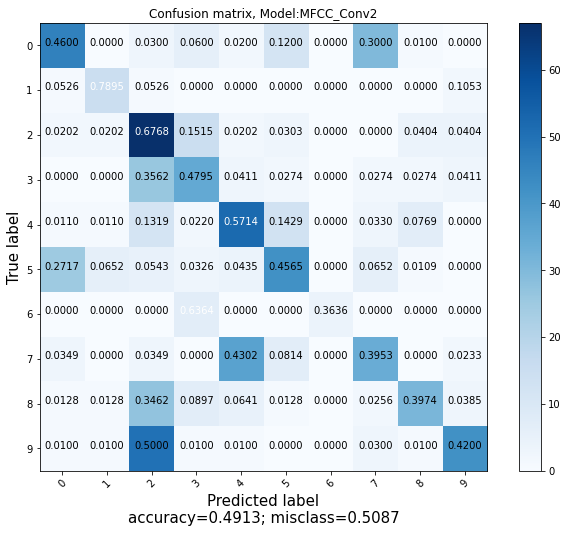

In [ ]:
import matplotlib.pyplot as plt
plot_confuse(model, X_test, y_test)


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, InputLayer, Dropout, Conv1D, Conv2D, Flatten, Reshape, MaxPooling1D, MaxPooling2D, BatchNormalization, TimeDistributed,LeakyReLU,SpatialDropout2D,GlobalAveragePooling2D,AveragePooling1D,AveragePooling2D
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import regularizers
# EPOCHS = 100
# # this controls the batch size, or you can manipulate the tf.data.Dataset objects yourself
# BATCH_SIZE = 32
# input_length=len(X_train[0])
# callbacks = []

In [ ]:
# model = Sequential()

# model.add(Reshape((173, 40,1), input_shape=(40, 173, 1)))
# model.add(AveragePooling2D(pool_size=(4,1),strides=4))
# model.add(Conv2D(18, kernel_size=5, activation='relu', kernel_constraint=tf.keras.constraints.MaxNorm(1)))
# model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
# model.add(Conv2D(36, kernel_size=3, activation='relu', kernel_constraint=tf.keras.constraints.MaxNorm(1), padding='same'))
# model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))

# model.add(Flatten())
# model.add(Dense(40, activation='relu',
#     activity_regularizer=tf.keras.regularizers.l1(0.00001)))
# model.add(Dropout(0.4))
# model.add(Dense(10, activation='softmax', name='y_pred'))
# # this controls the learning rate
# opt = Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999)

# # train the neural network
# model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# model.fit(X_train,Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val,Y_val), verbose=2, callbacks=callbacks)
# print(model.summary())
# # Use this flag to disable per-channel quantization for a model.
# # This can reduce RAM usage for convolutional models, but may have
# # an impact on accuracy.
# disable_per_channel_quantization = False




Epoch 1/100
140/140 - 1s - loss: 2.2506 - accuracy: 0.1883 - val_loss: 1.9990 - val_accuracy: 0.2623 - 1s/epoch - 10ms/step
Epoch 2/100
140/140 - 1s - loss: 1.9657 - accuracy: 0.2611 - val_loss: 1.8256 - val_accuracy: 0.3080 - 556ms/epoch - 4ms/step
Epoch 3/100
140/140 - 1s - loss: 1.8373 - accuracy: 0.3112 - val_loss: 1.5879 - val_accuracy: 0.4145 - 505ms/epoch - 4ms/step
Epoch 4/100
140/140 - 1s - loss: 1.7769 - accuracy: 0.3325 - val_loss: 1.5352 - val_accuracy: 0.4557 - 506ms/epoch - 4ms/step
Epoch 5/100
140/140 - 0s - loss: 1.7258 - accuracy: 0.3547 - val_loss: 1.5350 - val_accuracy: 0.4163 - 491ms/epoch - 4ms/step
Epoch 6/100
140/140 - 0s - loss: 1.6813 - accuracy: 0.3654 - val_loss: 1.4846 - val_accuracy: 0.4718 - 493ms/epoch - 4ms/step
Epoch 7/100
140/140 - 0s - loss: 1.6538 - accuracy: 0.3661 - val_loss: 1.4200 - val_accuracy: 0.4297 - 498ms/epoch - 4ms/step
Epoch 8/100
140/140 - 1s - loss: 1.6357 - accuracy: 0.3724 - val_loss: 1.4150 - val_accuracy: 0.4861 - 500ms/epoch - 4ms

In [ ]:
# Save the model to disk
model.save('/content/drive/MyDrive/Thesis_Keras/MFCC/data/saved_models/mfccConv1D')

In [ ]:
score = model.evaluate(
        x=X_test,
        y=Y_test)

55/55 [==============================] - 0s 3ms/step - loss: 1.2108 - accuracy: 0.6883
